In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans



reg_season_detailed_pd = pd.read_csv('data/RegularSeasonDetailedResults.csv')
reg_season_detailed_2018_pd = pd.read_csv('data/RegularSeasonDetailedResults_Prelim2018.csv')
seasons_pd = pd.read_csv('data/Seasons.csv')
teams_pd = pd.read_csv('data/Teams.csv')
teamList = teams_pd['Team_Name'].tolist()
tourney_compact_pd = pd.read_csv('data/TourneyCompactResults.csv')
tourney_detailed_pd = pd.read_csv('data/TourneyDetailedResults.csv')
tourney_seeds_pd = pd.read_csv('data/TourneySeeds.csv')
tourney_seeds_pd.columns = ['Season', 'Seed', 'Team_Id']
tourney_slots_pd = pd.read_csv('data/TourneySlots.csv')
ncaa_tourney_compact_pd = pd.read_csv('data/NCAATourneyCompactResults.csv')
teams_pd_2 = pd.read_csv('data/Teams-2.csv')
print(reg_season_detailed_pd.tail())

       Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
76631    2017     132   1276      71   1458      56    N      0    27    48   
76632    2017     132   1343      71   1463      59    N      0    25    52   
76633    2017     132   1348      70   1433      63    N      0    24    54   
76634    2017     132   1374      71   1153      56    N      0    26    52   
76635    2017     132   1407      59   1402      53    N      0    21    60   

      ...   Lfga3  Lftm  Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf  
76631 ...      15     6     8   14   18    10   15     4     3   13  
76632 ...      20    13    19   14   20    12    7     4     5   13  
76633 ...      14    17    22   23   24     8    5     4     1   16  
76634 ...      24    14    18   17   22     7    7     7     1   13  
76635 ...      17     7     8    9   27    10   17     1     7   18  

[5 rows x 34 columns]


In [9]:
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]
var_1 = reg_season_detailed_2017_pd.groupby(['Wteam']).agg(['count'])
var_2 = reg_season_detailed_2017_pd.groupby(['Lteam']).agg(['count'])
print(var_1.head(), var_2.head())

      Season Daynum Wscore Lteam Lscore  Wloc Numot  Wfgm  Wfga Wfgm3  ...   \
       count  count  count count  count count count count count count  ...    
Wteam                                                                  ...    
1101       9      9      9     9      9     9     9     9     9     9  ...    
1102      10     10     10    10     10    10    10    10    10    10  ...    
1103      25     25     25    25     25    25    25    25    25    25  ...    
1104      19     19     19    19     19    19    19    19    19    19  ...    
1105       2      2      2     2      2     2     2     2     2     2  ...    

      Lfga3  Lftm  Lfta   Lor   Ldr  Last   Lto  Lstl  Lblk   Lpf  
      count count count count count count count count count count  
Wteam                                                              
1101      9     9     9     9     9     9     9     9     9     9  
1102     10    10    10    10    10    10    10    10    10    10  
1103     25    25    25    

In [61]:
win_team = reg_season_detailed_2017_pd.groupby(['Wteam'], as_index=False).mean()
win_season_stats = []
for index, row in win_team.iterrows():
    win_season_stats.append([row['Wteam'], row['Wscore'], row['Lscore'], row['Wfgm'] / row['Wfga'] * 100, 
                         row['Wfga'], row['Wfga3'], row['Wfgm3'] / row['Wfga3'] * 100, 
                         row['Wftm'] / row['Wfta'] * 100, row['Wor'], row['Wdr'],
                         row['Wast'], row['Wto'], row['Wstl'], row['Wblk'], row['Wpf']])
win_season_stats = pd.DataFrame(win_season_stats)
win_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

lose_team = reg_season_detailed_2017_pd.groupby(['Lteam'], as_index=False).mean()
lose_season_stats = []
for index, row in lose_team.iterrows():
    lose_season_stats.append([row['Lteam'], row['Lscore'], row['Wscore'], row['Lfgm'] / row['Lfga'] * 100, 
                         row['Lfga'], row['Lfga3'], row['Lfgm3'] / row['Lfga3'] * 100, 
                         row['Lftm'] / row['Lfta'] * 100, row['Lor'], row['Ldr'],
                         row['Last'], row['Lto'], row['Lstl'], row['Lblk'], row['Lpf']])

lose_season_stats = pd.DataFrame(lose_season_stats)
lose_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
season_stats = win_season_stats.append(lose_season_stats)
season_stats = season_stats.groupby(['team'], as_index=False).mean()
season_stats.shape

(351, 15)

In [63]:
winning_df = reg_season_detailed_2017_pd[['Wteam', 'Wscore', 'Lscore', 'Wfgm', 'Wfga', 'Wfga3', 'Wfgm3', 'Wftm', 
                                          'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']]
losing_df = reg_season_detailed_2017_pd[['Lteam', 'Lscore', 'Wscore', 'Lfgm', 'Lfga', 'Lfga3', 'Lfgm3', 'Lftm',
                                         'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']]
winning_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fga3', 'fgm3', 'ftm', 'fta', 'or', 'dr', 'ast',
                      'to', 'stl', 'blk', 'pf']
losing_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fga3', 'fgm3', 'ftm', 'fta', 'or', 'dr', 'ast',
                      'to', 'stl', 'blk', 'pf']
season_stats_df = winning_df.append(winning_df)
print(season_stats_df.groupby(['team'], as_index=False).mean())
season_stats = season_stats_df.groupby(['team'], as_index=False).mean()

     team        for    against        fgm        fga       fga3       fgm3  \
0    1101  74.333333  69.666667  24.000000  49.555556  18.222222   7.777778   
1    1102  80.100000  66.700000  26.000000  54.800000  20.200000   9.200000   
2    1103  79.720000  69.840000  26.840000  55.240000  26.840000  10.680000   
3    1104  72.947368  59.000000  24.578947  56.105263  21.157895   7.473684   
4    1105  83.000000  75.000000  27.500000  53.000000  19.500000  10.500000   
5    1106  75.714286  68.000000  25.142857  57.714286  21.714286   7.000000   
6    1107  78.100000  64.300000  27.300000  56.350000  14.950000   6.200000   
7    1108  73.800000  62.933333  25.933333  55.600000  20.533333   7.466667   
8    1110  66.500000  58.625000  24.750000  49.500000  13.500000   5.125000   
9    1111  76.857143  67.000000  24.857143  58.142857  24.428571   9.571429   
10   1112  77.866667  64.166667  26.533333  55.266667  17.400000   7.166667   
11   1113  89.466667  77.066667  29.066667  60.66666

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


         Team_Id
cluster         
0             33
1             47
2             29
3             20
4             11
5             26
6             18
7             22
8             36
9             18
10            25
11            14
12             8
13            24
14            20
        team       for   against       fg%       fga      fga3      fg3%  \
0   0.438092  0.376354  0.426195  0.419807  0.413654  0.450700  0.375063   
1   0.412395  0.391435  0.368958  0.387069  0.288152  0.267704  0.544643   
2   0.605583  0.497257  0.577985  0.525987  0.435285  0.504322  0.472611   
3   0.736436  0.648821  0.596087  0.564522  0.499280  0.582111  0.710370   
4   0.347258  0.257445  0.319404  0.238640  0.463611  0.526034  0.294976   
5   0.325297  0.255529  0.376530  0.351595  0.318732  0.330230  0.270482   
6   0.533510  0.409305  0.503598  0.491866  0.328227  0.324167  0.556703   
7   0.535096  0.483087  0.423217  0.421116  0.294603  0.273225  0.745268   
8   0.550812  0.495988  0.4

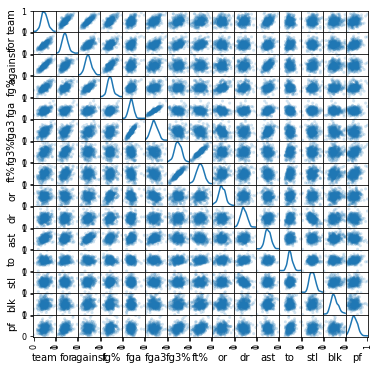

In [68]:
%matplotlib inline


num_clusters = 15
x = season_stats.drop(['team'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)
# scaled_df.columns = ['for', 'agst', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
#                        'pf']
scaled_df.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
from pandas.tools.plotting import scatter_matrix
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(scaled_df)

cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
print(cluster_map.groupby('cluster').count())
pairs = []
for i in range(0,num_clusters):
    for j in range(0,num_clusters):
        if(i != j):
            pairs.append([i, j])

percentages = np.zeros((num_clusters,num_clusters))
for pair in pairs:
    cluster_1_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id)
    ]
    cluster_2_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id)
    ]
    percentages[pair[0], pair[1]] = cluster_1_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
    percentages[pair[1], pair[0]] = cluster_2_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
centers = pd.DataFrame(kmeans.cluster_centers_)
# centers.columns = ['for', 'agst', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
centers.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
centers['cluster'] = ['cluster ' + str(i) for i in centers.index]
centers.set_index(['cluster'])
centers.to_csv('test.csv')
pd.DataFrame(percentages).to_csv('test1.csv')
print(centers)
print(pd.DataFrame(percentages))
mm_teams = tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017].Team_Id.values
mm_team_clusters = cluster_map[cluster_map['Team_Id'].isin(mm_teams)]
cluster_seeds = pd.merge(mm_team_clusters, tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017])
team_cluster_seeds = pd.merge(cluster_seeds, teams_pd)
test = team_cluster_seeds.groupby('cluster')['Team_Name'].apply(lambda x: "%s" % ', '.join(x))
print(test)

In [62]:
tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]
# tourney_games = reg_season_detailed_2018_pd[reg_season_detailed_2018_pd['Season'] == 2017]
correct_games = 0
incorrect_games = 0
unknown_games = 0
print(cluster_map)
#tourney_games = tourney_games[4:36]
print(tourney_games.shape)
for index, game in tourney_games.iterrows():
    w_team_cluster = cluster_map[cluster_map['Team_Id'] == game['WTeamID']].cluster.values[0]
    l_team_cluster = cluster_map[cluster_map['Team_Id'] == game['LTeamID']].cluster.values[0]
    if percentages[w_team_cluster, l_team_cluster] >= 0.5:
        correct_games = correct_games + 1
    elif percentages [w_team_cluster, l_team_cluster] > 0:
        incorrect_games = incorrect_games + 1
    
print (correct_games, incorrect_games)

     Team_Id  cluster
0       1101        1
1       1102        8
2       1103        8
3       1104        9
4       1105        2
5       1106        7
6       1107        1
7       1108        0
8       1110        5
9       1111        8
10      1112        1
11      1113        3
12      1114        5
13      1115        0
14      1116       11
15      1117        8
16      1119       10
17      1120        3
18      1122        3
19      1123        2
20      1124        9
21      1125       10
22      1126        0
23      1127       10
24      1129        8
25      1130        2
26      1131        0
27      1132        6
28      1133        7
29      1135        7
..       ...      ...
321     1433        6
322     1434        1
323     1435       10
324     1436        5
325     1437        4
326     1438        5
327     1439        8
328     1440        3
329     1441        1
330     1442       10
331     1443        1
332     1444        7
333     1447       12
334     14

In [65]:
reg_season_detailed_2018 = reg_season_detailed_2018_pd[reg_season_detailed_2018_pd['Season'] == 2018]
win_team_2018 = reg_season_detailed_2018.groupby(['WTeamID'], as_index=False).mean()
win_team_stats_2018 = []
for index, row in win_team_2018.iterrows():
    win_team_stats_2018.append([row['WTeamID'], row['WScore'], row['LScore'], row['WFGM'] / row['WFGA'] * 100, 
                         row['WFGA'], row['WFGA3'], row['WFGM3'] / row['WFGA3'] * 100, 
                         row['WFTM'] / row['WFTA'] * 100, row['WOR'], row['WDR'],
                         row['WAst'], row['WTO'], row['WStl'], row['WBlk'], row['WPF']])
win_team_stats_2018 = pd.DataFrame(win_season_stats)
win_team_stats_2018.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

lose_team_2018 = reg_season_detailed_2018.groupby(['LTeamID'], as_index=False).mean()
lose_season_stats_2018 = []
for index, row in lose_team_2018.iterrows():
    lose_season_stats_2018.append([row['LTeamID'], row['LScore'], row['WScore'], row['LFGM'] / row['LFGA'] * 100, 
                         row['LFGA'], row['LFGA3'], row['LFGM3'] / row['LFGA3'] * 100, 
                         row['LFTM'] / row['LFTA'] * 100, row['LOR'], row['LDR'],
                         row['LAst'], row['LTO'], row['LStl'], row['LBlk'], row['LPF']])

lose_season_stats_2018 = pd.DataFrame(lose_season_stats)
lose_season_stats_2018.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
season_stats_2018 = win_team_stats_2018.append(lose_season_stats_2018)
season_stats_2018 = season_stats_2018.groupby(['team'], as_index=False).mean()
season_stats_2018.shape
x_2018 = season_stats_2018.drop(['team'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_2018 = min_max_scaler.fit_transform(x_2018)
scaled_df_2018 = pd.DataFrame(x_scaled_2018)
scaled_df_2018.columns = ['for', 'agst', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
preds_2018 = kmeans.predict(scaled_df_2018)
teams = pd.DataFrame()
teams['Team_Id'] = season_stats_2018['team'].values
teams['cluster'] = pd.DataFrame(preds_2018)
team_names = pd.merge(teams, teams_pd)
print(team_names)
print(percentages)
game_outcomes = []
for team in team_names.iterrows():
    team = team[1]
    team2 = team2[1]
    print(team[1])
    for team2 in team_names.iterrows():
        if (team[0] != team2[0]):
            game_outcomes.append(team[2] + " beats " + team2[2] + " with probability " 
                                 + percentages[team[1], team2[1]])
print(game_outcomes)
# print(team_names.groupby('cluster')['Team_Name'].apply(lambda x: "%s" % ', '.join(x)).values)

ValueError: Incorrect number of features. Got 14 features, expected 15

In [6]:
scaled_df.columns = ['score', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['score'])
plt.figure(1)
plt.scatter(data_label['score'], data_label['fg%'], c=data_label.cluster)
plt.xlabel('score')
plt.ylabel('fga')

ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

In [ ]:
reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()

In [ ]:

season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fg%')

In [ ]:
season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wscore'], label='data1', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lscore'], label='data2', lw=2, marker='s')

In [ ]:
%matplotlib inline
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(season_groupby['Season'], season_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(season_groupby['Season'], season_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(season_groupby['Season'], season_groupby['Wftm']/season_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lftm']/season_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
%matplotlib inline
tournament_groupby = tourney_detailed_pd.groupby(['Season'], as_index=False).mean()
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(tournament_groupby['Season'], tournament_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(tournament_groupby['Season'], tournament_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfga'] - tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfga'] - tournament_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(tournament_groupby['Season'], (tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'])/(tournament_groupby['Wfga'] - tournament_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], (tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'])/(tournament_groupby['Lfga'] - tournament_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm3']/tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm3']/tournament_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wftm']/tournament_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lftm']/tournament_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner regular season', color='green', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner tournament', color='blue', lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser regular season', color='red', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='winner tournament', color='orange', lw=1, marker='o')
plt.legend(loc='best')
plt.title('Fields Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(3)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Made by Season')
plt.xlabel('season')
plt.ylabel('fgm3')
plt.figure(4)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Attempted by Season')
plt.xlabel('season')
plt.ylabel('fga3')

In [ ]:
reg_season_detailed_years_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
reg_season_detailed_years_pd['Wfgm2'] = reg_season_detailed_years_pd['Wfgm'] - reg_season_detailed_years_pd['Wfgm3']
reg_season_detailed_years_pd['Wfga2'] = reg_season_detailed_years_pd['Wfga'] - reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Wfg%2'] = reg_season_detailed_years_pd['Wfgm2']/reg_season_detailed_years_pd['Wfga2']
reg_season_detailed_years_pd['Lfgm2'] = reg_season_detailed_years_pd['Lfgm'] - reg_season_detailed_years_pd['Lfgm3']
reg_season_detailed_years_pd['Lfga2'] = reg_season_detailed_years_pd['Lfga'] - reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Lfg%2'] = reg_season_detailed_years_pd['Lfgm2']/reg_season_detailed_years_pd['Lfga2']
reg_season_detailed_years_pd['Wfg%'] = reg_season_detailed_years_pd['Wfgm']/reg_season_detailed_years_pd['Wfga']
reg_season_detailed_years_pd['Lfg%'] = reg_season_detailed_years_pd['Lfgm']/reg_season_detailed_years_pd['Lfga']
reg_season_detailed_years_pd['Wfg%3'] = reg_season_detailed_years_pd['Wfgm3']/reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Lfg%3'] = reg_season_detailed_years_pd['Lfgm3']/reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Wft%'] = reg_season_detailed_years_pd['Wftm']/reg_season_detailed_years_pd['Wfta']
reg_season_detailed_years_pd['Lft%'] = reg_season_detailed_years_pd['Lftm']/reg_season_detailed_years_pd['Lfta']
reg_season_detailed_years_pd = reg_season_detailed_years_pd.fillna(0)
x = reg_season_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

tournament_detailed_years_pd = tourney_detailed_pd[tourney_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
tournament_detailed_years_pd['Wfgm2'] = tournament_detailed_years_pd['Wfgm'] - tournament_detailed_years_pd['Wfgm3']
tournament_detailed_years_pd['Wfga2'] = tournament_detailed_years_pd['Wfga'] - tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Wfg%2'] = tournament_detailed_years_pd['Wfgm2']/tournament_detailed_years_pd['Wfga2']
tournament_detailed_years_pd['Lfgm2'] = tournament_detailed_years_pd['Lfgm'] - tournament_detailed_years_pd['Lfgm3']
tournament_detailed_years_pd['Lfga2'] = tournament_detailed_years_pd['Lfga'] - tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Lfg%2'] = tournament_detailed_years_pd['Lfgm2']/tournament_detailed_years_pd['Lfga2']
tournament_detailed_years_pd['Wfg%'] = tournament_detailed_years_pd['Wfgm']/tournament_detailed_years_pd['Wfga']
tournament_detailed_years_pd['Lfg%'] = tournament_detailed_years_pd['Lfgm']/tournament_detailed_years_pd['Lfga']
tournament_detailed_years_pd['Wfg%3'] = tournament_detailed_years_pd['Wfgm3']/tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Lfg%3'] = tournament_detailed_years_pd['Lfgm3']/tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Wft%'] = tournament_detailed_years_pd['Wftm']/tournament_detailed_years_pd['Wfta']
tournament_detailed_years_pd['Lft%'] = tournament_detailed_years_pd['Lftm']/tournament_detailed_years_pd['Lfta']
tournament_detailed_years_pd = tournament_detailed_years_pd.fillna(0)
x_1 = tournament_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_1_scaled = min_max_scaler.fit_transform(x_1)

x_mean = np.mean(x_scaled, axis=0)
x_1_mean = np.mean(x_1_scaled, axis=0)
x_diff = x_mean - x_1_mean 
print(x_diff)
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(x_scaled)


In [ ]:
from pandas.tools.plotting import scatter_matrix
print(scaled_df)
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')